# ¡Analicemos el consumo eléctrico!
En esta actividad, vamos a analizar el consumo eléctrico registrado en Galicia desde junio de 2021 hasta mayo de 2025 (son los últimos 48 meses disponibles). 
## Descripción de la actividad 1
En esta primera actividad, hay que explorar los datos de consumo eléctrico mensual en Galicia. Para ello, debéis:
1. Explorar los datos por medio de gráficos que muestren la evolución/cambio del consumo eléctrico a lo largo del tiempo.
2. A partir del gráfico, identificar posibles tendencias o valores anómalos.
3. Calcular y mostrar las siguientes estadísticas descriptivas:
   1. Media del consumo eléctrico.
   2. Cogiendo información de cada uno de los meses del año, calcular la media de consumo eléctrico para cada mes (media de todos los meses de enero, media de todos los meses de febrero, etc.). También es necesario calcular la desviación típica para cada mes.
   3. Identificar los valores máximos y mínimos del consumo eléctrico, así como los diferentes máximos y mínimos locales.

En este fichero, se proporcionan partes del código que podéis usar para llevar a cabo la actividad.

### Recomendaciones
Si queréis hacer un gráfico organizado por años y meses, podéis crear una nueva columna en el DataFrame que contenga la combinación de año y mes en formato "AAAA-MM". Esto facilitará la visualización en el eje x del gráfico. También os puede servir para ordenar los datos si es necesario.

### Origen de los datos
Esta información es real y se puede descargar desde la web de [Red Eléctrica de España](https://www.ree.es/es/datos/demanda/evolucion), filtrándola por fecha y comunidad autónoma.

En este caso, los datos ya se han tratado previamente y están formados por dos columnas de datos, la fecha (año-mes-día) y el consumo eléctrico en megavatios hora (MWh).

El fichero que se usa tiene el siguiente aspecto:

| | consumo_mwh | anio | mes |
|-:|------------:|-----:|----:|
|0| 1365134.110 | 2021 |  6  |
|1| 1369843.940 | 2021 |  7  |
|2| 1377124.299 | 2021 |  8  |
|3| 1381155.204 | 2021 |  9  |
|4| 1418232.566 | 2021 | 10  |



## Importar las librerías necesarias y cargar los datos

In [ ]:
# Instalar librerías necesarias (si no están ya instaladas)
%pip install pandas matplotlib scipy

In [1]:
# Cargamos los datos del CSV 2023
import pandas as pd # Manipulación de datos
import matplotlib.pyplot as plt # Gráficos
import statistics as stats # Estadísticas generales
from scipy.signal import find_peaks # Detección de máximos y mínimos locales

In [2]:
datos_red_fichero = "2021_junio_2025_mayo_electricidad.csv"

In [3]:
# Carga del fichero CSV en un DataFrame de pandas
datos_red_df = pd.read_csv(datos_red_fichero)

# Ordenación de los datos por año y mes
datos_red_df.sort_values(by=["anio", "mes"], inplace=True)

In [4]:
datos_red_df.head()

,consumo_mwh,anio,mes
0,1365134.110,2021,6
1,1369843.940,2021,7
2,1377124.299,2021,8
3,1381155.204,2021,9
4,1418232.566,2021,10


In [5]:
# Se creará una columna nueva "anio_mes" para agrupar por meses y 
# años los datos con el fin de etiquetar el eje X de las gráficas de consumo
datos_red_df["anio_mes"] = datos_red_df["anio"].astype(
    str) + "-" + datos_red_df["mes"].astype(str).str.zfill(2)

## Creación del gráfico inicial

In [6]:
# Esta variable decide cada cuántos meses se pone una etiqueta en el eje X de las gráficas
espaciado_meses_plot = 3

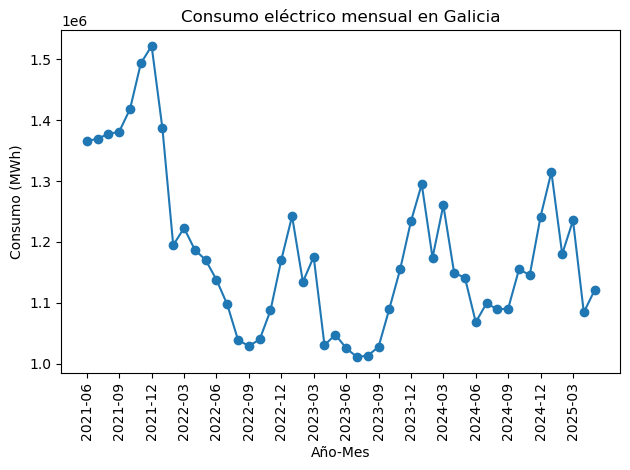

In [7]:
plt.clf()  # Limpiar la figura para futuros gráficos

# Datos a imprimir en el gráfico
plt.plot(datos_red_df['consumo_mwh'], marker='o')

#La siguiente línea ajusta las etiquetas del eje X para que no se amontonen 
# y se gira 90 grados para poder leerlo correctametne
plt.xticks(ticks=range(0, len(datos_red_df), espaciado_meses_plot),
           labels=datos_red_df["anio_mes"].iloc[::espaciado_meses_plot], rotation=90)
# Etiquetas y título
plt.xlabel('Año-Mes')
plt.ylabel('Consumo (MWh)')
plt.title('Consumo eléctrico mensual en Galicia')
plt.tight_layout()
plt.show()


In [8]:
# Calcular la media de consumo por medio de un bucle
suma_consumo = 0
for i in range(len(datos_red_df)):
    suma_consumo += datos_red_df.loc[i, 'consumo_mwh']

media_consumo = suma_consumo / len(datos_red_df)

In [9]:
# Calculo de la desviación estándar por medio de la función stats.stdev()
std_consumo = stats.stdev(datos_red_df['consumo_mwh'])

In [10]:
# Cálculo de la mediana usando la función stats.median()
mediana_consumo = stats.median(datos_red_df['consumo_mwh'])

In [11]:
# Cálculo del valor mínimo y máximo de consumo. Se inicializa a más y menos infinito para encontrar siempre un valor válido.
min_consumo = float('inf')
max_consumo = float('-inf')

for i in range(len(datos_red_df)):
    consumo_actual = datos_red_df.loc[i, 'consumo_mwh']
    if consumo_actual > max_consumo:
        max_consumo = consumo_actual
    if consumo_actual <= min_consumo:
        min_consumo = consumo_actual

In [12]:
print(f"-- Información estadística del consumo eléctrico mensual en Galicia ({datos_red_df['anio'].min()}-{datos_red_df['anio'].max()}) --")
print(f"     La media de consumo mensual es: {media_consumo:.2f} MWh")
print(f"     La desviación estándar del consumo mensual es: {std_consumo:.2f} MWh")
print(f"     La mediana del consumo mensual es: {mediana_consumo:.2f} MWh")
print(f"     El consumo mínimo es de: {min_consumo:.2f} MWh")
print(f"     El consumo máximo es de: {max_consumo:.2f} MWh")

-- Información estadística del consumo eléctrico mensual en Galicia (2021-2025) --
     La media de consumo mensual es: 1181621.38 MWh
     La desviación estándar del consumo mensual es: 130770.01 MWh
     La mediana del consumo mensual es: 1154746.18 MWh
     El consumo mínimo es de: 1010884.46 MWh
     El consumo máximo es de: 1521980.40 MWh


In [13]:
# Identificar máximos y mínimos locales, por medio de la función find_peaks(). Para los mínimos se invierte el signo del consumo.
max_local_consumo, _ = find_peaks(datos_red_df['consumo_mwh'])
min_local_consumo, _ = find_peaks(-datos_red_df['consumo_mwh'])
min_max_local_consumo = sorted(list(max_local_consumo) + list(min_local_consumo))


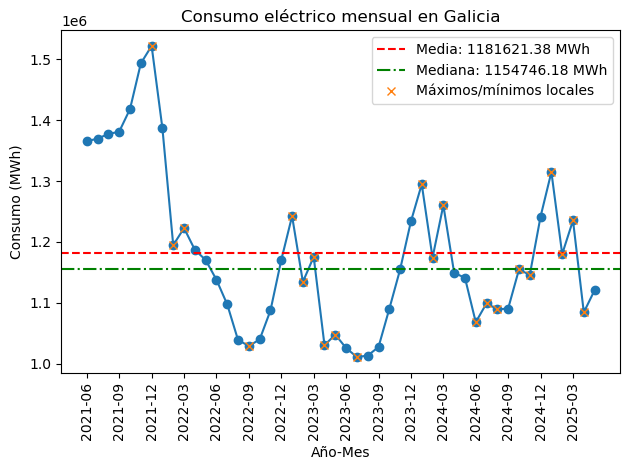

In [14]:
plt.clf()  # Limpiar la figura para futuros gráficos
plt.plot(datos_red_df["anio_mes"],datos_red_df['consumo_mwh'], marker='o')
plt.axhline(y=media_consumo, color='r', linestyle='--', label=f'Media: {media_consumo:.2f} MWh')
plt.axhline(y=mediana_consumo, color='g', linestyle='-.', label=f'Mediana: {mediana_consumo:.2f} MWh')

plt.plot(min_max_local_consumo, datos_red_df['consumo_mwh'].iloc[min_max_local_consumo], "x", label='Máximos/mínimos locales')
#La siguiente línea ajusta las etiquetas del eje X para que no se amontonen de 3 en 3 y se gira 90 grados para poder leerlo correctametne
plt.xticks(ticks=range(0, len(datos_red_df), espaciado_meses_plot),
           labels=datos_red_df["anio_mes"].iloc[::espaciado_meses_plot], rotation=90)
plt.xlabel('Año-Mes')
plt.ylabel('Consumo (MWh)')
plt.title('Consumo eléctrico mensual en Galicia')
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# Ahora, se va a hacer el análisis mensual: media, desviación estándar y mediana de cada mes a lo largo de los años
# Para ello, se harán las operaciones de un modo similar al anterior, pero agrupando por mes


# Se obtienen los meses únicos en el DataFrame y se ordenan
meses_disponibles = sorted(datos_red_df['mes'].unique())

# Se crea un dataFrame para almacenar la información de cada mes
informacion_meses = pd.DataFrame(columns=['mes', 'media_consumo', 'std_consumo', 'mediana_consumo'], index = meses_disponibles)

# Se itera sobre los meses disponibles para calcular las estadísticas
for mes in meses_disponibles:
    # Obtener del dataframe los datos correspondientes al mes actual
    consumos_mes = datos_red_df[datos_red_df['mes'] == mes]['consumo_mwh']
    media_mes = sum(consumos_mes) / len(consumos_mes)
    mediana_mes = stats.median(consumos_mes)
    std_mes = stats.stdev(consumos_mes)

    # Almacenar los resultados en el DataFrame
    informacion_meses.at[mes, "media_consumo"] = media_mes
    informacion_meses.at[mes, "std_consumo"] = std_mes
    informacion_meses.at[mes, "mediana_consumo"] = mediana_mes

informacion_meses.sort_index(inplace=True)

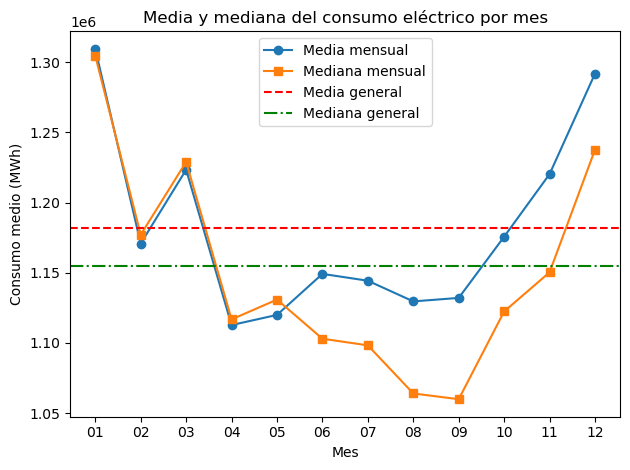

In [16]:
plt.clf()
plt.plot(informacion_meses["media_consumo"], marker='o', label='Media mensual')
plt.plot(informacion_meses["mediana_consumo"], marker='s', label='Mediana mensual')
plt.axhline(y=media_consumo, color='r', linestyle='--', label=f'Media general')
plt.axhline(y=mediana_consumo, color='g', linestyle='-.',  label=f'Mediana general')


plt.xlabel('Mes')
plt.ylabel('Consumo medio (MWh)')
plt.title('Media y mediana del consumo eléctrico por mes')
plt.xticks(ticks=range(1, 13), labels=[str(m).zfill(2) for m in range(1, 13)])
plt.legend()
plt.tight_layout()
plt.show()

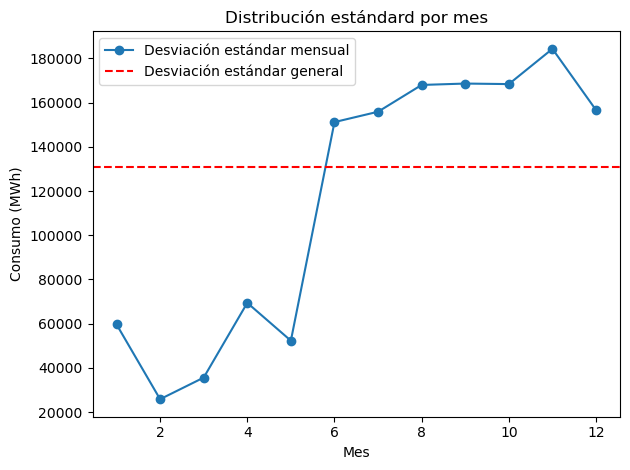

In [17]:
plt.clf()

# Create boxplot for each month
plt.plot(informacion_meses["std_consumo"], marker='o', label='Desviación estándar mensual')
plt.axhline(y=std_consumo, color='r', linestyle='--', label=f'Desviación estándar general')

plt.xlabel('Mes')
plt.ylabel('Consumo (MWh)')
plt.title('Distribución estándard por mes')
plt.legend()
plt.tight_layout()
plt.show()

#### Preguntas práctica 1
1. ¿Cuál es el valor medio y la mediana de estos datos? ¿A qué crees que se debe la diferencia o similitud?
2. ¿Cuál ha sido el mes más con mayor y menor consumo? ¿Notas muchas diferencias con respecto al segundo? De ser así, ¿a qué crees que se debe?

## Actividad 2. ¿Electricidad inversamente proporcional a buen tiempo?
En la actividad anterior se ha analizado la evolución del consumo eléctrico mensual en Galicia entre 2021 y 2025. Ahora, vamos a intentar buscar un motivo por el cual ha habido épocas con mayor y menor consumo. Algo que puede estar relacionado es la temperatura o climatología. Por ello, se han descargado datos de Aemet para contrastarlos con los del consumo eléctrico. Para ello, apoyándote de la información anterior, debes buscar patrones de comportamiento comunes.

Primero, sería conveniente hacer un análisis de esta información como se hizo en el ejercicio anterior, y posteriormente relacionarlas

El fichero que se usa tiene el siguiente aspecto (donde tm_mes es la temperatura media de ese mes):

| anio | mes | tm_mes | anio_mes |
|-----:|----:|-------:|:--------|
| 2021 | 10  | 16.450 | 2021-10 |
| 2021 | 11  | 10.625 | 2021-11 |
| 2021 | 12  | 11.525 | 2021-12 |
| 2021 | 6   | 17.950 | 2021-06 |
| 2021 | 7   | 19.925 | 2021-07 |

In [18]:
# Nombre del fichero de entrada y carga de datos
datos_temp_fichero = "2021_junio_2025_mayo_temperatura.csv"
datos_temp = pd.read_csv(datos_temp_fichero)

In [19]:
# Se creará una columna nueva "anio_mes" para agrupar por meses y 
# años los datos con el fin de etiquetar el eje X de las gráficas de consumo
datos_temp['anio_mes'] = datos_temp["anio"].astype(
    str) + "-" + datos_temp["mes"].astype(str).str.zfill(2)

In [20]:
datos_temp.head()

,anio,mes,tm_mes,anio_mes
0,2021,10,16.450,2021-10
1,2021,11,10.625,2021-11
2,2021,12,11.525,2021-12
3,2021,6,17.950,2021-06
4,2021,7,19.925,2021-07


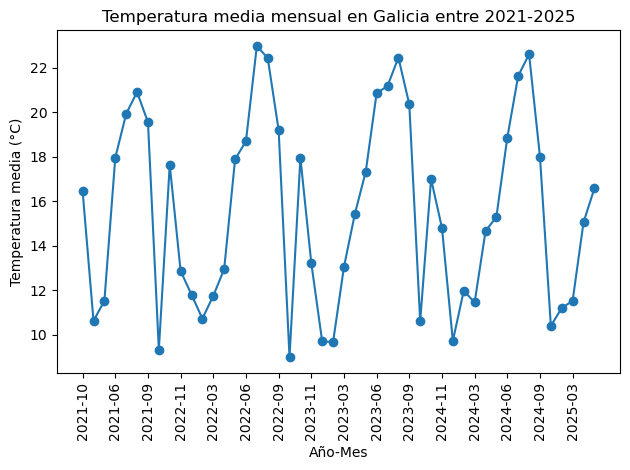

In [21]:
# Se hace un gráfico de la temperatura media mensual
plt.clf()  # Limpiar la figura para futuros gráficos

# Datos a imprimir en el gráfico
plt.plot(datos_temp['tm_mes'], marker='o')

#La siguiente línea ajusta las etiquetas del eje X para que no se amontonen 
# y se gira 90 grados para poder leerlo correctametne
plt.xticks(ticks=range(0, len(datos_temp), espaciado_meses_plot),
           labels=datos_temp["anio_mes"].iloc[::espaciado_meses_plot], rotation=90)
# Etiquetas y título
plt.xlabel('Año-Mes')
plt.ylabel('Temperatura media (°C)')
plt.title(f'Temperatura media mensual en Galicia entre {datos_temp["anio"].min()}-{datos_temp["anio"].max()}')
plt.tight_layout()
plt.show()

In [22]:
# Calcular la media de temperatura por medio de un bucle
suma_temp = 0
for i in range(len(datos_temp)):
    suma_temp += datos_temp.loc[i, 'tm_mes']

media_temp = suma_temp / len(datos_temp)

In [23]:
# Cálculo de la desviación estándar y mediana usando las funciones de statistics
mediana_temp = stats.median(datos_temp["tm_mes"])
std_temp = stats.stdev(datos_temp["tm_mes"])


In [24]:
# Cálculo del valor mínimo y máximo de temperatura. Se inicializa a más y menos infinito para encontrar siempre un valor válido.
min_temp = float('inf')
max_temp = float('-inf')

for i in range(len(datos_temp)):
    temp_actual = datos_temp.loc[i, "tm_mes"]
    if temp_actual > max_temp:
        max_temp = temp_actual
    if temp_actual < min_temp:
        min_temp = temp_actual


In [25]:
print("-- Información estadística de la temperatura media mensual en Galicia --")
print(f"     La temperatura media es: {media_temp:.2f} °C")
print(f"     La desviación estándar es: {std_temp:.2f} °C")
print(f"     La mediana es: {mediana_temp:.2f} °C")
print(f"     La temperatura mínima es: {min_temp:.2f} °C")
print(f"     La temperatura máxima es: {max_temp:.2f} °C")

-- Información estadística de la temperatura media mensual en Galicia --
     La temperatura media es: 15.56 °C
     La desviación estándar es: 4.31 °C
     La mediana es: 15.36 °C
     La temperatura mínima es: 9.00 °C
     La temperatura máxima es: 22.98 °C


In [26]:
# Identificar máximos y mínimos locales, por medio de la función find_peaks(). Para los mínimos se invierte el signo del consumo.
max_local_temp, _ = find_peaks(datos_temp['tm_mes'])
min_local_temp, _ = find_peaks(-datos_temp['tm_mes'])
min_max_local_temp = sorted(list(max_local_temp) + list(min_local_temp))

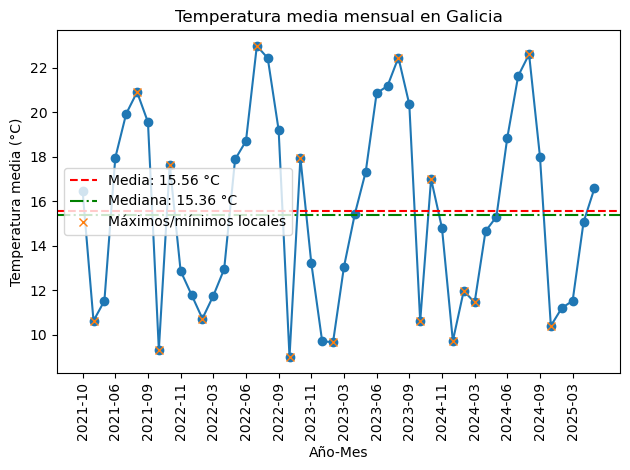

In [27]:
plt.clf()  # Limpiar la figura para futuros gráficos
plt.plot(datos_temp["anio_mes"],datos_temp['tm_mes'], marker='o')
plt.axhline(y=media_temp, color='r', linestyle='--', label=f'Media: {media_temp:.2f} °C')
plt.axhline(y=mediana_temp, color='g', linestyle='-.', label=f'Mediana: {mediana_temp:.2f} °C')

plt.plot(min_max_local_temp, datos_temp['tm_mes'].iloc[min_max_local_temp], "x", label='Máximos/mínimos locales')
#La siguiente línea ajusta las etiquetas del eje X para que no se amontonen de 3 en 3 y se gira 90 grados para poder leerlo correctametne
plt.xticks(ticks=range(0, len(datos_temp), espaciado_meses_plot),
           labels=datos_temp["anio_mes"].iloc[::espaciado_meses_plot], rotation=90)
plt.xlabel('Año-Mes')
plt.ylabel('Temperatura media (°C)')
plt.title('Temperatura media mensual en Galicia')
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
# Análisis mensual de la temperatura media a lo largo de los años

meses_temp = sorted(datos_temp["mes"].unique())

info_temp_meses = pd.DataFrame(
    columns=["media_temp", "std_temp", "mediana_temp"],
    index=meses_temp
)

for mes in meses_temp:
    temps_mes = datos_temp[datos_temp["mes"] == mes]["tm_mes"]
    info_temp_meses.at[mes, "media_temp"] = stats.mean(temps_mes)
    info_temp_meses.at[mes, "std_temp"] = stats.stdev(temps_mes)
    info_temp_meses.at[mes, "mediana_temp"] = stats.median(temps_mes)

info_temp_meses.sort_index(inplace=True)

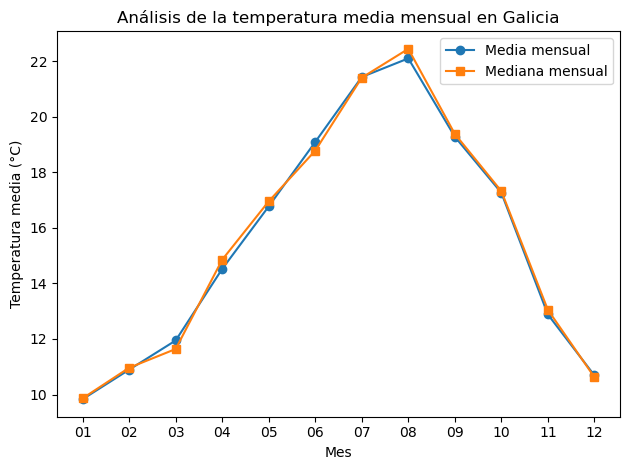

In [29]:
plt.clf()

plt.plot(info_temp_meses["media_temp"], marker='o', label="Media mensual")
plt.plot(info_temp_meses["mediana_temp"], marker='s', label="Mediana mensual")

plt.xlabel("Mes")
plt.ylabel("Temperatura media (°C)")
plt.title("Análisis de la temperatura media mensual en Galicia")
plt.xticks(ticks=range(1,13), labels=[str(m).zfill(2) for m in range(1,13)])
plt.legend()
plt.tight_layout()
plt.show()


In [38]:
# Análisis conjunto de la temperatura media mensual y el consumo eléctrico mensual
# Para ello, se normalizarán los datos porque no son comparables.
datos_red_df["consumo_norm"] = (datos_red_df["consumo_mwh"] - min_consumo) / (max_consumo - min_consumo)
datos_temp["temp_norm"] = (datos_temp["tm_mes"] - min_temp) / (max_temp - min_temp)


informacion_meses["consumo_norm"] = (informacion_meses["media_consumo"] - informacion_meses["media_consumo"].min()) / (informacion_meses["media_consumo"].max() - informacion_meses["media_consumo"].min())
info_temp_meses["temp_norm"] = (info_temp_meses["media_temp"] - info_temp_meses["media_temp"].min()) / (info_temp_meses["media_temp"].max() - info_temp_meses["media_temp"].min())

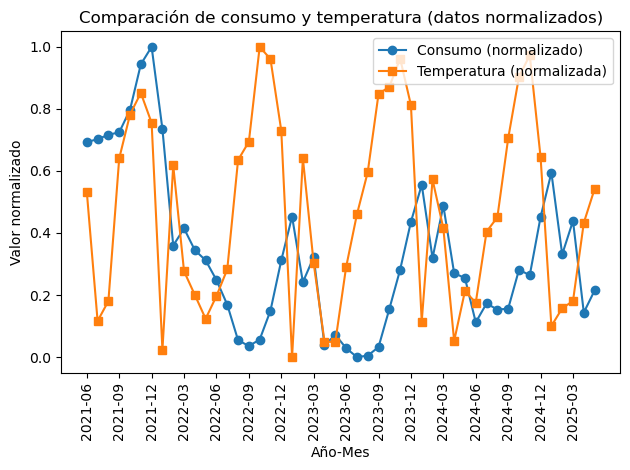

In [31]:
plt.clf()

plt.plot(datos_red_df["consumo_norm"].values, marker='o', label="Consumo (normalizado)")
plt.plot(datos_temp["temp_norm"].values, marker='s', label="Temperatura (normalizada)")

plt.xticks(
    ticks=range(0, len(datos_red_df), espaciado_meses_plot),
    labels=datos_red_df["anio_mes"].iloc[::espaciado_meses_plot],
    rotation=90
)

plt.xlabel("Año-Mes")
plt.ylabel("Valor normalizado")
plt.title("Comparación de consumo y temperatura (datos normalizados)")
plt.legend()
plt.tight_layout()
plt.show()


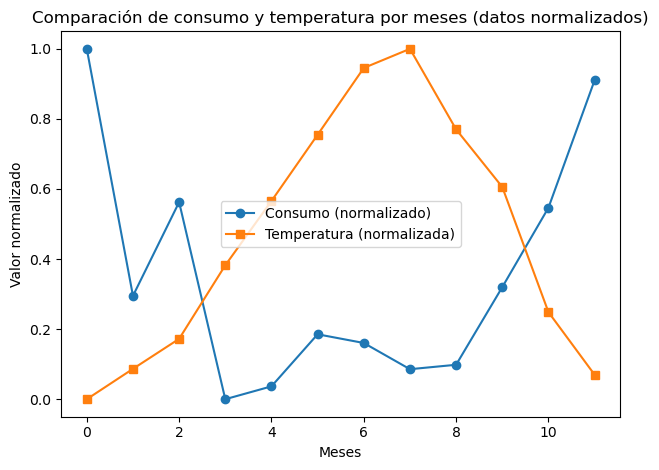

In [39]:
plt.clf()

plt.plot(informacion_meses["consumo_norm"].values, marker='o', label="Consumo (normalizado)")
plt.plot(info_temp_meses["temp_norm"].values, marker='s', label="Temperatura (normalizada)")

plt.xticks()

plt.xlabel("Meses")
plt.ylabel("Valor normalizado")
plt.title("Comparación de consumo y temperatura por meses (datos normalizados)")
plt.legend()
plt.tight_layout()
plt.show()
